## Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf
import sklearn.metrics

from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

## Import CSV

In [3]:
customers = pd.read_csv('csv/olist_customers_dataset.csv')
geo = pd.read_csv('csv/olist_geolocation_dataset.csv')
items = pd.read_csv('csv/olist_order_items_dataset.csv')
payments = pd.read_csv('csv/olist_order_payments_dataset.csv')
reviews = pd.read_csv('csv/olist_order_reviews_dataset.csv')
orders = pd.read_csv('csv/olist_orders_dataset.csv')
products = pd.read_csv('csv/olist_products_dataset.csv')
sellers = pd.read_csv('csv/olist_sellers_dataset.csv')
category_name_translation = pd.read_csv('csv/product_category_name_translation.csv')

## A Preliminary Look

In [4]:
# With this table alone we can take a look at our demographic info. 
customers.head()
# customers.shape[0] we have 99,441 rows

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [5]:
# This will be used to visualize said demographics
geo.head()
# geo.shape[0] we have 1,000,163 rows

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [6]:
items.head()
# items.shape[0] we have 112,650 rows

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [7]:
payments.head()
# payments.shape[0] we have 103,886 ro111111111111111ws

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [8]:
reviews.head() 
# reviews.shape[0] we have 100,000 rows

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [9]:
orders.head()
# orders.shape[0] we have 99331 rows

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [10]:
products.head()
# products.shape[0] we have 32951 rows

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [11]:
sellers.head()
# sellers.shape[0] we have 3095 rows

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [12]:
category_name_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [13]:
# Changing category names from portuguese to english

# for product_category_name in products: 
#     if product_category_name 


## Exploratory Analysis 

### Demographics 

In [14]:
customers.customer_zip_code_prefix.value_counts().iloc[:10].index

Int64Index([22790, 24220, 22793, 24230, 22775, 29101, 13212, 35162, 22631,
            38400],
           dtype='int64')

In [15]:
# Here we're going to take a look at the top 10 zipcodes and their cities. I think we assume that Sao Paulo and Rio will take all the spots but lets see ! :) 
top_ten_zip = customers['customer_zip_code_prefix'].value_counts().head(10).index
top_ten_zip

Int64Index([22790, 24220, 22793, 24230, 22775, 29101, 13212, 35162, 22631,
            38400],
           dtype='int64')

Text(0, 0.5, 'Count')

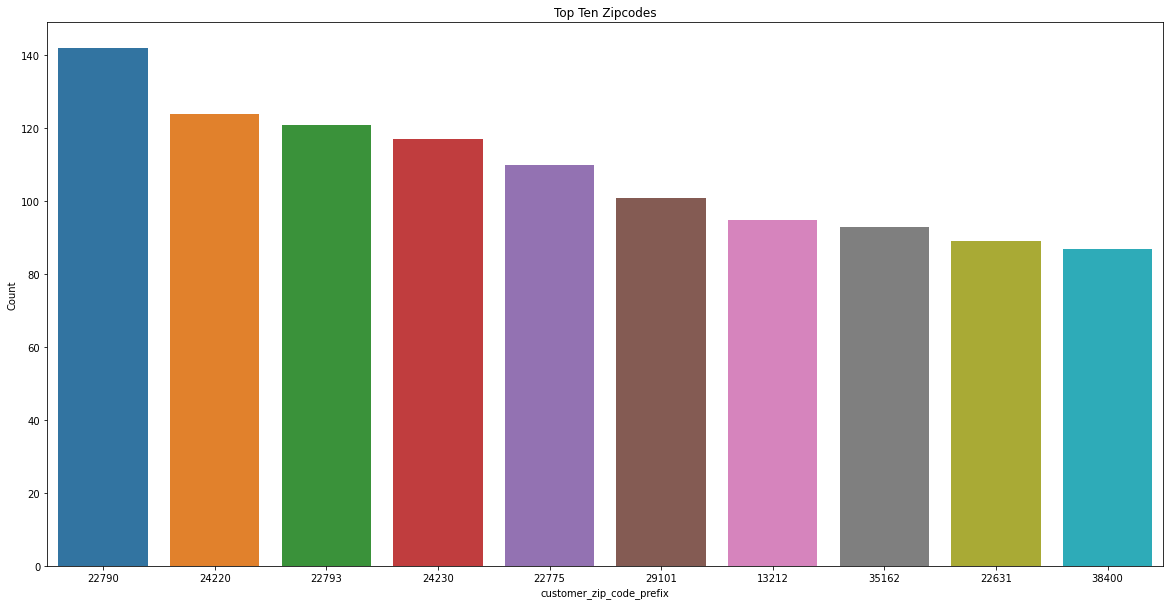

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x="customer_zip_code_prefix", data=customers,  order=customers['customer_zip_code_prefix'].value_counts().head(10).index)
plt.title("Top Ten Zipcodes")
plt.xlabel("customer_zip_code_prefix")
plt.ylabel("Count")

In [17]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [18]:
orders_test = orders

In [19]:
# Change timestamp columns from str to timestamp
orders_test['order_purchase_timestamp'] = orders_test['order_purchase_timestamp'].astype('datetime64[ns]') 
orders_test['order_approved_at'] = orders_test['order_approved_at'].astype('datetime64[ns]') 
orders_test['order_delivered_carrier_date'] = orders_test['order_delivered_carrier_date'].astype('datetime64[ns]') 
orders_test['order_delivered_customer_date'] = orders_test['order_delivered_customer_date'].astype('datetime64[ns]') 
orders_test['order_estimated_delivery_date'] = orders_test['order_estimated_delivery_date'].astype('datetime64[ns]') 


In [20]:
orders_test['Diff_approved-purchase(min)'] = (orders_test['order_approved_at'] - orders_test['order_purchase_timestamp']).dt.components['minutes']
orders_test['diff_deliv_carrier-approved(hours)'] = (orders_test['order_delivered_carrier_date'] - orders_test['order_approved_at']).dt.components['hours']
orders_test['diff_deliv_customer-carrier(days)'] = (orders_test['order_delivered_customer_date'] - orders_test['order_delivered_carrier_date']).dt.components['days']
orders_test['diff_est_deliv-deliv(days)'] = (orders_test['order_estimated_delivery_date'] - orders_test['order_delivered_customer_date']).dt.components['days']


In [21]:
orders_test['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [22]:
orders_test['diff_est_deliv-deliv(days)'].isna().value_counts()

False    96476
True      2965
Name: diff_est_deliv-deliv(days), dtype: int64

In [23]:
orders_test.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  Diff_approved-purchase(min)  \
0                    2017-10-18                         10.0   
1                    2018-08-13                         42.0   
2                    2018-09-04                         16.0   
3                    2017-12-15                         17.0   
4                    2018-02-26                          1.0   

   diff_deliv_carrier-approved(hours)  diff_deliv_customer-carrier(days)  \
0                                 8.0                                6.0   
1                                11.0                               12.0   
2                                 4.0                                9.0   
3                                17.0                                9.0   
4                                21.0                                1.0   

   diff_est_deliv-deliv(days)  
0                         7.0  
1                         5.0  
2                        17.0  
3                        12.0  
4                         9.0

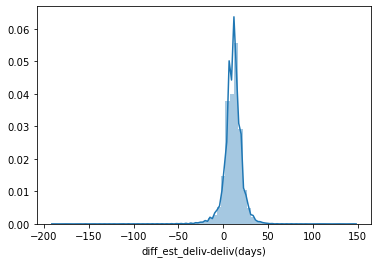

In [24]:
sns.distplot(orders_test['diff_est_deliv-deliv(days)'], bins=70)

## Preparing data for regression

In [25]:
## Drop NA's and test data
orders_test1 = orders_test.dropna()

In [26]:
## Checking NA's 
orders_test1.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
Diff_approved-purchase(min)           0
diff_deliv_carrier-approved(hours)    0
diff_deliv_customer-carrier(days)     0
diff_est_deliv-deliv(days)            0
dtype: int64

In [27]:
## merging data
orders_test1 = pd.merge(orders_test1, items, on = 'order_id')

In [28]:
orders_test1 = pd.merge(orders_test1, products, on = 'product_id')

In [29]:
orders_test1 = orders_test1.dropna()

In [30]:
orders_test1.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
Diff_approved-purchase(min)           0
diff_deliv_carrier-approved(hours)    0
diff_deliv_customer-carrier(days)     0
diff_est_deliv-deliv(days)            0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      0
product_length_cm                     0
product_height_cm                     0


In [31]:
orders_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108643 entries, 0 to 110179
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   order_id                            108643 non-null  object        
 1   customer_id                         108643 non-null  object        
 2   order_status                        108643 non-null  object        
 3   order_purchase_timestamp            108643 non-null  datetime64[ns]
 4   order_approved_at                   108643 non-null  datetime64[ns]
 5   order_delivered_carrier_date        108643 non-null  datetime64[ns]
 6   order_delivered_customer_date       108643 non-null  datetime64[ns]
 7   order_estimated_delivery_date       108643 non-null  datetime64[ns]
 8   Diff_approved-purchase(min)         108643 non-null  float64       
 9   diff_deliv_carrier-approved(hours)  108643 non-null  float64       
 10  diff_del

In [32]:
orders_test1.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-08-15 18:29:31 2017-08-15 20:05:16   
2    delivered      2017-08-02 18:24:47 2017-08-02 18:43:15   
3    delivered      2017-10-23 23:26:46 2017-10-25 02:14:11   
4    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-08-17 15:28:33           2017-08-18 14:44:43   
2          2017-08-04 17:35:43           2017-08-07 18:30:01   
3          2017-10-27 16:48:46           2017-11-07 18:04:59   
4          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  Diff_approved-purchase(min)  \
0                    2017-10-18                         10.0   
1                    2017-08-28                         35.0   
2                    2017-08-15                         18.0   
3                    2017-11-13                         47.0   
4                    2018-08-13                         42.0   

   diff_deliv_carrier-approved(hours)  ...   price  freight_value  \
0                                 8.0  ...   29.99           8.72   
1                                19.0  ...   29.99           7.78   
2                                22.0  ...   29.99           7.78   
3                                14.0  ...   29.99          14.10   
4                                11.0  ...  118.70          22.76   

   product_category_name product_name_lenght product_description_lenght  \
0  utilidades_domesticas                40.0                      268.0   
1  utilidades_domesticas                40.0                      268.0   
2  utilidades_domesticas                40.0                      268.0   
3  utilidades_domesticas                40.0                      268.0   
4             perfumaria                29.0                      178.0   

  product_photos_qty  product_weight_g  product_length_cm product_height_cm  \
0                4.0             500.0               19.0               8.0   
1                4.0             500.0               19.0               8.0   
2                4.0             500.0               19.0               8.0   
3                4.0             500.0               19.0               8.0   
4                1.0             400.0               19.0              13.0   

   product_width_cm  
0              13.0  
1              13.0  
2              13.0  
3              13.0  
4              19.0  

[5 rows x 26 columns]

In [33]:
# Here we are creating a column for density
orders_test1['density'] = (orders_test1['product_weight_g'] / (orders_test1['product_length_cm'] * orders_test1['product_height_cm'] * orders_test1['product_width_cm'])).round(3)

In [34]:
orders_test1['volume'] = ((orders_test1['product_length_cm'] * orders_test1['product_height_cm'] * orders_test1['product_width_cm'])).round(3)

\

### Top 10 most common Density & Volume

Text(0, 0.5, 'Density')

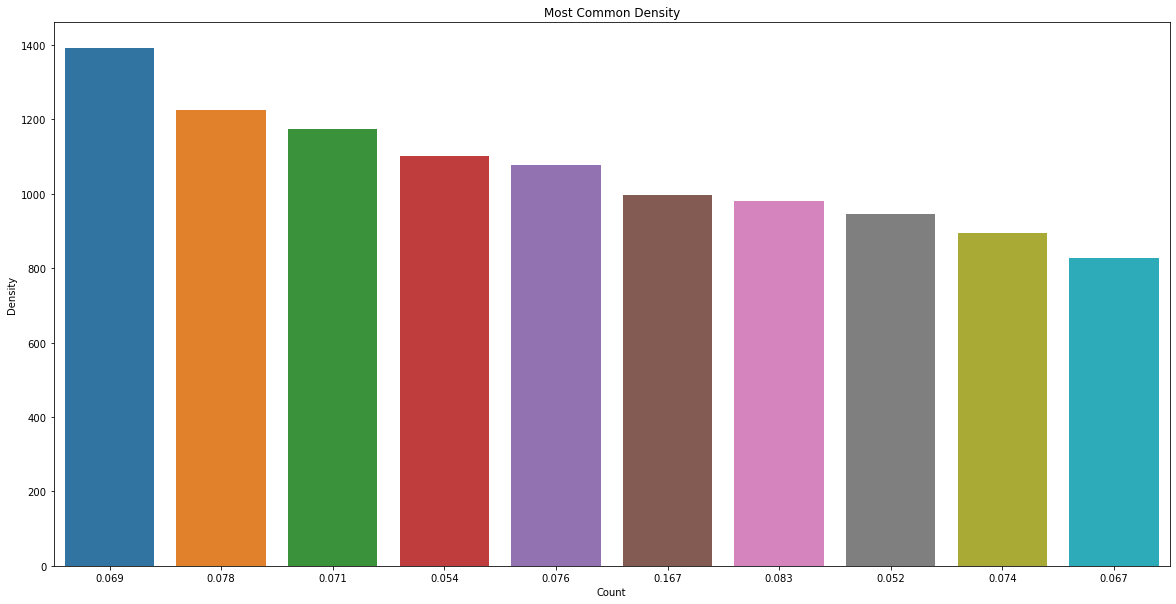

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x="density", data=orders_test1,  order=orders_test1['density'].value_counts().head(10).index)
plt.title("Most Common Density")
plt.xlabel("Count")
plt.ylabel("Density")

Text(0, 0.5, 'y')

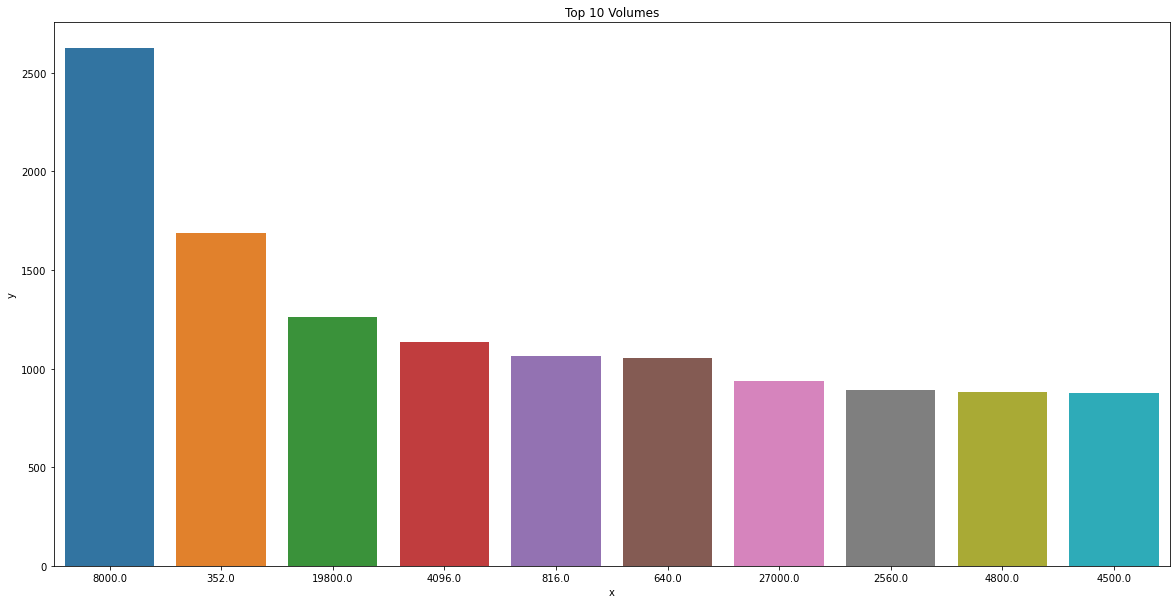

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x="volume", data=orders_test1,  order=orders_test1['volume'].value_counts().head(10).index)
plt.title("Top 10 Volumes")
plt.xlabel("x")
plt.ylabel("y")

In [37]:
pd.set_option('display.max_columns', None)

orders_test1[orders_test1.loc[:, 'volume'] == 8000.0]

order_id                       customer_id  \
428     dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
801     ecab90c9933c58908d3d6add7c6f5ae3  761df82feda9778854c6dafdaeb567e4   
802     37073d851c3f30deebe598e5a586bdbd  2128bfdcc221a8085d953289385d3015   
803     c18ddf35acd22ea390ff66a9edc66d8e  25b19669d19a5e41a97a9b171a7bc396   
804     62f808f5e8babdf5f0092f748ce5b554  ccfc8745472a2addccbf7af46409aef6   
...                                  ...                               ...   
109915  7fee7d4412f1c3a36d5c873789b75a4e  e1ff7d78a58e41ab3e811cce1c387870   
109918  79fc8a1c3556b7c15ea2948b4a679a57  5336f0fe822d7535e4574f501006abff   
109936  94b35c9542f07ad80b3367f9051b63af  ae3a3a6fd9128d8617e2cb3a88a7598b   
109937  7f99c35e1289684c803ee00ca1d2b05f  b8fc0f17153fc77c169c3d1fa75ed7bc   
110139  ada8de3a9486cea2fce7f4b00319cf3c  9065a96b91a08c08755c4ea2618884f2   

       order_status order_purchase_timestamp   order_approved_at  \
428       delivered      2018-06-07 19:03:12 2018-06-12 23:31:02   
801       delivered      2018-02-25 13:50:30 2018-02-25 14:47:35   
802       delivered      2018-05-14 21:17:34 2018-05-15 08:35:20   
803       delivered      2017-09-10 17:19:16 2017-09-10 17:30:23   
804       delivered      2018-02-15 19:02:26 2018-02-17 03:48:00   
...             ...                      ...                 ...   
109915    delivered      2017-05-03 10:35:16 2017-05-03 11:25:22   
109918    delivered      2018-05-05 14:04:22 2018-05-05 14:15:21   
109936    delivered      2017-01-24 12:38:48 2017-01-25 02:42:34   
109937    delivered      2018-01-26 08:17:52 2018-01-26 08:29:53   
110139    delivered      2018-07-09 18:25:16 2018-07-11 03:26:03   

       order_delivered_carrier_date order_delivered_customer_date  \
428             2018-06-11 14:54:00           2018-06-21 15:34:32   
801             2018-02-26 22:28:50           2018-03-27 23:29:14   
802             2018-05-15 15:12:00           2018-06-15 16:42:30   
803             2017-09-11 19:17:42           2017-09-18 19:59:40   
804             2018-02-21 20:07:41           2018-02-23 23:39:11   
...                             ...                           ...   
109915          2017-05-04 14:38:43           2017-05-11 20:17:36   
109918          2018-05-08 13:50:00           2018-05-12 11:58:36   
109936          2017-01-26 16:32:31           2017-02-07 08:42:04   
109937          2018-01-26 19:43:00           2018-02-09 20:37:53   
110139          2018-07-11 12:12:00           2018-07-24 21:22:15   

       order_estimated_delivery_date  Diff_approved-purchase(min)  \
428                       2018-07-04                         27.0   
801                       2018-04-13                         57.0   
802                       2018-06-06                         17.0   
803                       2017-09-29                         11.0   
804                       2018-03-08                         45.0   
...                              ...                          ...   
109915                    2017-06-02                         50.0   
109918                    2018-05-25                         10.0   
109936                    2017-03-31                          3.0   
109937                    2018-03-05                         12.0   
110139                    2018-08-06                          0.0   

        diff_deliv_carrier-approved(hours)  diff_deliv_customer-carrier(days)  \
428                                   15.0                               10.0   
801                                    7.0                               29.0   
802                                    6.0                               31.0   
803                                    1.0                                7.0   
804                                   16.0                                2.0   
...                                    ...                                ...   
109915                                 3.0           

### Top 10 most common Freight Value Prices

Text(0, 0.5, 'y')

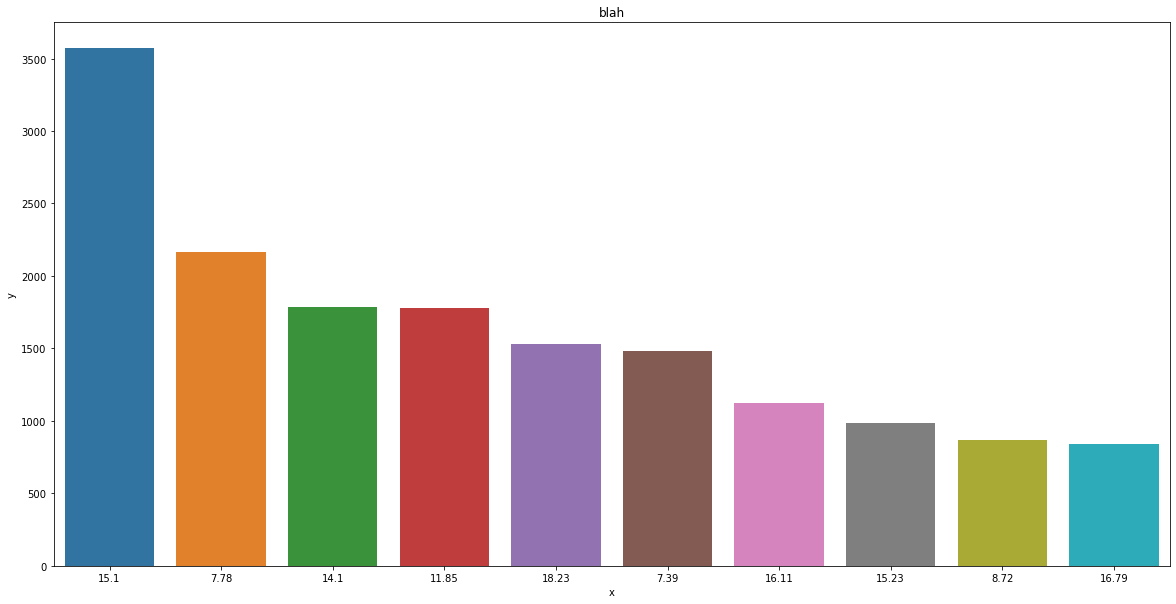

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x ="freight_value", data=orders_test1,  order=orders_test1['freight_value'].value_counts().head(10).index)
plt.title("blah")
plt.xlabel("x")
plt.ylabel("y")

In [39]:
# Late Deliveries
orders_test1.loc[orders_test1['diff_deliv_customer-carrier(days)'] > orders_test1['diff_est_deliv-deliv(days)'], 'late'] = 'late'
orders_test1.loc[orders_test1['diff_deliv_customer-carrier(days)'] < orders_test1['diff_est_deliv-deliv(days)'], 'late'] = 'on time'


In [40]:
orders_test1['late'].value_counts()

on time    74167
late       31435
Name: late, dtype: int64

### Number of late orders

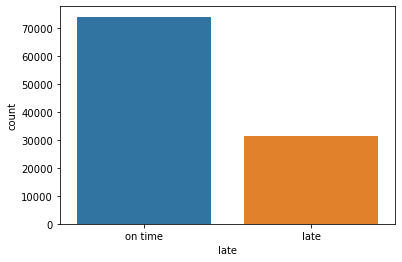

In [41]:
#number of late orders
sns.countplot(x='late', data=orders_test1)

In [42]:
on_time = orders_test1['diff_deliv_customer-carrier(days)'] - orders_test1['diff_est_deliv-deliv(days)']

### Basic stats

In [43]:
print('this is the mean delivery time' + ' ' + str(on_time.mean()))
print('this is the most occuring delivery time' + ' ' + str(on_time.mode()))
print('this is the median delivery time' + ' ' + str(on_time.median()))

this is the mean delivery time -2.301878630008376
this is the most occuring delivery time 0   -8.0
dtype: float64
this is the median delivery time -5.0


In [44]:
late = orders_test1[orders_test1.loc[:, 'diff_est_deliv-deliv(days)'] < 0]

In [45]:
late

order_id                       customer_id  \
13      6552ae78f1de31bcde1fc2cfcab0d25d  ccb212cf6faf1356d9b5509259de0940   
32      fc74153e0ac39bb68c8f8f9e4758f001  787c8dad81798b72c5ae7d0ed526192e   
33      bb535f122a301b2b48f02befcedfcad5  5fa3e7405bd851a51f1e1aa56fc145a0   
42      f7f0b79050e7ef0b1cf7ffceb0aa114a  46fb8cff647939aaf32c4ab5be554501   
47      591d010258be8e3bc48d82503022a507  c46809cdeaa8e5698a9169c27de52b7b   
...                                  ...                               ...   
110108  fbffb0b287b62d10b5a1c24a29ae16ea  0a952ecdee3346648d2dca69c55853d1   
110116  4a4ded48a84c0cee9a190dd22ce96866  2b22da03dd8511de17c84238e49082f9   
110138  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
110143  76a948cd55bf22799753720d4545dd2d  3f20a07b28aa252d0502fe7f7eb030a9   
110177  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

       order_status order_purchase_timestamp   order_approved_at  \
13        delivered      2018-05-17 14:05:28 2018-05-18 02:14:44   
32        delivered      2018-04-12 12:40:46 2018-04-13 12:50:48   
33        delivered      2017-08-03 11:36:18 2017-08-04 09:35:18   
42        delivered      2018-08-04 14:40:31 2018-08-07 04:44:36   
47        delivered      2018-05-22 13:04:15 2018-05-22 13:15:18   
...             ...                      ...                 ...   
110108    delivered      2017-09-26 10:51:26 2017-09-26 11:04:34   
110116    delivered      2017-12-28 21:32:44 2017-12-29 02:09:39   
110138    delivered      2018-05-22 21:13:21 2018-05-22 21:35:40   
110143    delivered      2018-01-30 02:41:30 2018-02-04 23:31:46   
110177    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   

       order_delivered_carrier_date order_delivered_customer_date  \
13              2018-05-23 12:44:00           2018-06-18 20:34:58   
32              2018-04-18 20:51:19           2018-06-29 17:03:25   
33              2017-08-07 14:40:04           2017-09-18 18:24:48   
42              2018-08-13 15:19:00           2018-08-14 15:08:57   
47              2018-05-25 12:41:00           2018-06-07 19:52:40   
...                             ...                           ...   
110108          2017-09-27 15:33:56           2017-10-19 00:08:00   
110116          2018-01-03 15:38:32           2018-02-25 14:54:29   
110138          2018-05-24 12:28:00           2018-06-12 23:11:29   
110143          2018-01-31 18:11:58           2018-03-18 20:08:50   
110177          2017-12-20 20:25:25           2018-01-26 15:45:14   

       order_estimated_delivery_date  Diff_approved-purchase(min)  \
13                        2018-06-07                          9.0   
32                        2018-05-11                         10.0   
33                        2017-08-25                         59.0   
42                        2018-08-10                          4.0   
47                        2018-06-04                         11.0   
...                              ...                          ...   
110108                    2017-10-11                         13.0   
110116                    2018-01-30                         36.0   
110138                    2018-06-08                         22.0   
110143                    2018-03-02                         50.0   
110177                    2018-01-18                         17.0   

        diff_deliv_carrier-approved(hours)  diff_deliv_customer-carrier(days)  \
13                                    10.0                               26.0   
32                                     8.0                               71.0   
33                                     5.0                               42.0   
42                                    10.0                                0.0   
47                                    23.0                               13.0   
...                                    ...                                ...   
110108                                 4.0           

### Distribution of Delivery times

Text(0, 0.5, 'Count of deliveries')

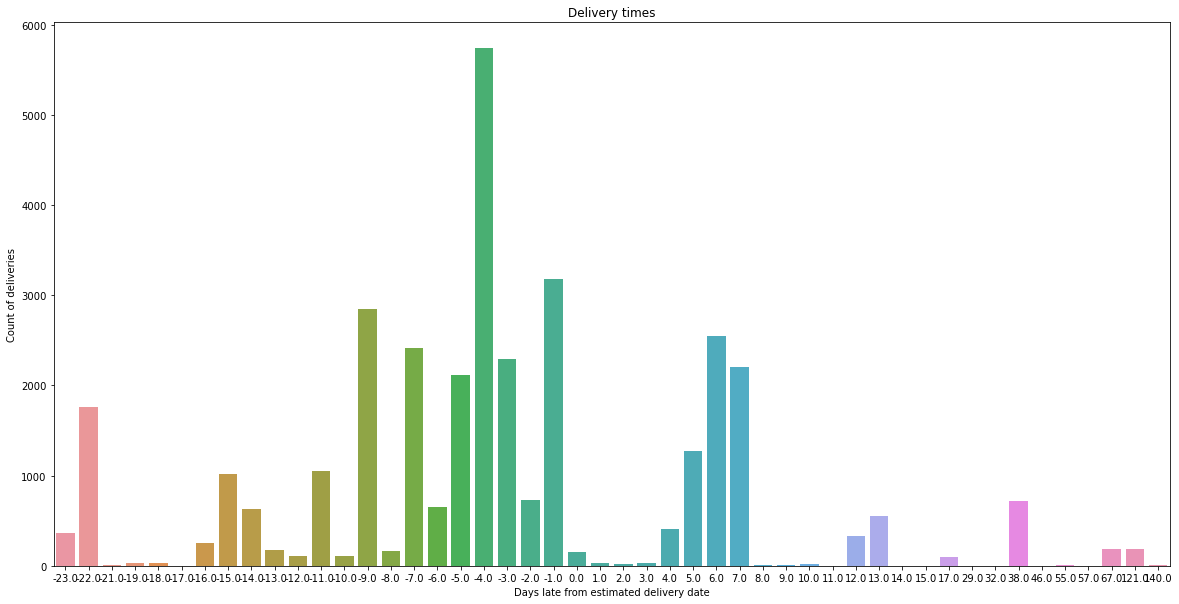

In [85]:
plt.figure(figsize=(20,10))
sns.countplot( x= on_time, data=on_time)
plt.title("Delivery times")
plt.xlabel("Days late from estimated delivery date")
plt.ylabel("Count of deliveries")

### Top 10 late categories (more than 2 days)

In [47]:
# DF <=-3
top_10_late = orders_test1[orders_test1.loc[:, 'diff_est_deliv-deliv(days)'] <= -3]
top_10_late = top_10_late.groupby('product_category_name', as_index = True).count().sort_values(by = 'order_id', ascending = False)
top_10_late = top_10_late.head(10)
top_10_late

order_id  customer_id  order_status  \
product_category_name                                         
cama_mesa_banho              673          673           673   
beleza_saude                 642          642           642   
moveis_decoracao             485          485           485   
esporte_lazer                483          483           483   
informatica_acessorios       432          432           432   
relogios_presentes           378          378           378   
utilidades_domesticas        292          292           292   
telefonia                    256          256           256   
automotivo                   250          250           250   
ferramentas_jardim           239          239           239   

                        order_purchase_timestamp  order_approved_at  \
product_category_name                                                 
cama_mesa_banho                              673                673   
beleza_saude                                 642                642   
moveis_decoracao                             485                485   
esporte_lazer                                483                483   
informatica_acessorios                       432                432   
relogios_presentes                           378                378   
utilidades_domesticas                        292                292   
telefonia                                    256                256   
automotivo                                   250                250   
ferramentas_jardim                           239                239   

                        order_delivered_carrier_date  \
product_category_name                                  
cama_mesa_banho                                  673   
beleza_saude                                     642   
moveis_decoracao                                 485   
esporte_lazer                                    483   
informatica_acessorios                           432   
relogios_presentes                               378   
utilidades_domesticas                            292   
telefonia                                        256   
automotivo                                       250   
ferramentas_jardim                               239   

                        order_delivered_customer_date  \
product_category_name                                   
cama_mesa_banho                                   673   
beleza_saude                                      642   
moveis_decoracao                                  485   
esporte_lazer                                     483   
informatica_acessorios                            432   
relogios_presentes                                378   
utilidades_domesticas                             292   
telefonia                                         256   
automotivo                                        250   
ferramentas_jardim                                239   

                        order_estimated_delivery_date  \
product_category_name                                   
cama_mesa_banho                                   673   
beleza_saude                                      642   
moveis_decoracao                                  485   
esporte_lazer                                     483   
informatica_acessorios                            432   
relogios_presentes                                378   
utilidades_domesticas                             292   
telefonia                                         256   
automotivo                                        250   
ferramentas_jardim                                239   

                        Diff_approved-purchase(min)  \
product_category_name                                 
cama_mesa_banho                                 673   
beleza_saude                                    642   
moveis_decoracao                                485   
esporte_lazer                                   483   
informatica_acessorios                   

In [48]:
top_10_seller = orders_test1[orders_test1.loc[:, 'diff_est_deliv-deliv(days)'] <= 0]
top_10_seller = top_10_seller.groupby('seller_id', as_index = True).count().sort_values(by = 'order_id', ascending = False)
# top_10_seller = top_10_seller.head(500)
top_10_seller

order_id  customer_id  order_status  \
seller_id                                                               
4a3ca9315b744ce9f8e9374361493884       248          248           248   
1f50f920176fa81dab994f9023523100       213          213           213   
6560211a19b47992c3666cc44a7e94c0       165          165           165   
4869f7a5dfa277a7dca6462dcf3b52b2       157          157           157   
7c67e1448b00f6e969d365cea6b010ab       154          154           154   
...                                    ...          ...           ...   
b98b715fe9e276204e2a3464f48cd796         1            1             1   
6806dad1da97bfb5a9038eac6881f706         1            1             1   
b90e891671cffd9557f33a97dc523645         1            1             1   
b8d890108a7a80e4f5d59eea9f362438         1            1             1   
191d55f7edb8524d525ed01b20fe32e8         1            1             1   

                                  order_purchase_timestamp  order_approved_at  \
seller_id                                                                       
4a3ca9315b744ce9f8e9374361493884                       248                248   
1f50f920176fa81dab994f9023523100                       213                213   
6560211a19b47992c3666cc44a7e94c0                       165                165   
4869f7a5dfa277a7dca6462dcf3b52b2                       157                157   
7c67e1448b00f6e969d365cea6b010ab                       154                154   
...                                                    ...                ...   
b98b715fe9e276204e2a3464f48cd796                         1                  1   
6806dad1da97bfb5a9038eac6881f706                         1                  1   
b90e891671cffd9557f33a97dc523645                         1                  1   
b8d890108a7a80e4f5d59eea9f362438                         1                  1   
191d55f7edb8524d525ed01b20fe32e8                         1                  1   

                                  order_delivered_carrier_date  \
seller_id                                                        
4a3ca9315b744ce9f8e9374361493884                           248   
1f50f920176fa81dab994f9023523100                           213   
6560211a19b47992c3666cc44a7e94c0                           165   
4869f7a5dfa277a7dca6462dcf3b52b2                           157   
7c67e1448b00f6e969d365cea6b010ab                           154   
...                                                        ...   
b98b715fe9e276204e2a3464f48cd796                             1   
6806dad1da97bfb5a9038eac6881f706                             1   
b90e891671cffd9557f33a97dc523645                             1   
b8d890108a7a80e4f5d59eea9f362438                             1   
191d55f7edb8524d525ed01b20fe32e8                             1   

                                  order_delivered_customer_date  \
seller_id                                                         
4a3ca9315b744ce9f8e9374361493884                            248   
1f50f920176fa81dab994f9023523100                            213   
6560211a19b47992c3666cc44a7e94c0                            165   
4869f7a5dfa277a7dca6462dcf3b52b2                            157   
7c67e1448b00f6e969d365cea6b010ab                            154   
...                                                         ...   
b98b715fe9e276204e2a3464f48cd796                              1   
6806dad1da97bfb5a9038eac6881f706                              1   
b90e891671cffd9557f33a97dc523645                              1   
b8d890108a7a80e4f5d59eea9f362438                              1   
191d55f7edb8524d525ed01b20fe32e8                              1   

                                  order_estimated_delivery_date  \
seller_id                                                         
4a3ca9315b744ce9f8e9374361493884                            248   
1f50f920176fa81dab994f9023523100                            213   
6560211a19b47992c3666cc44a7e94c

In [49]:
orders_test1.groupby('customer_id')

### Top 10 late delivery categories

Text(0, 0.5, 'Counts')

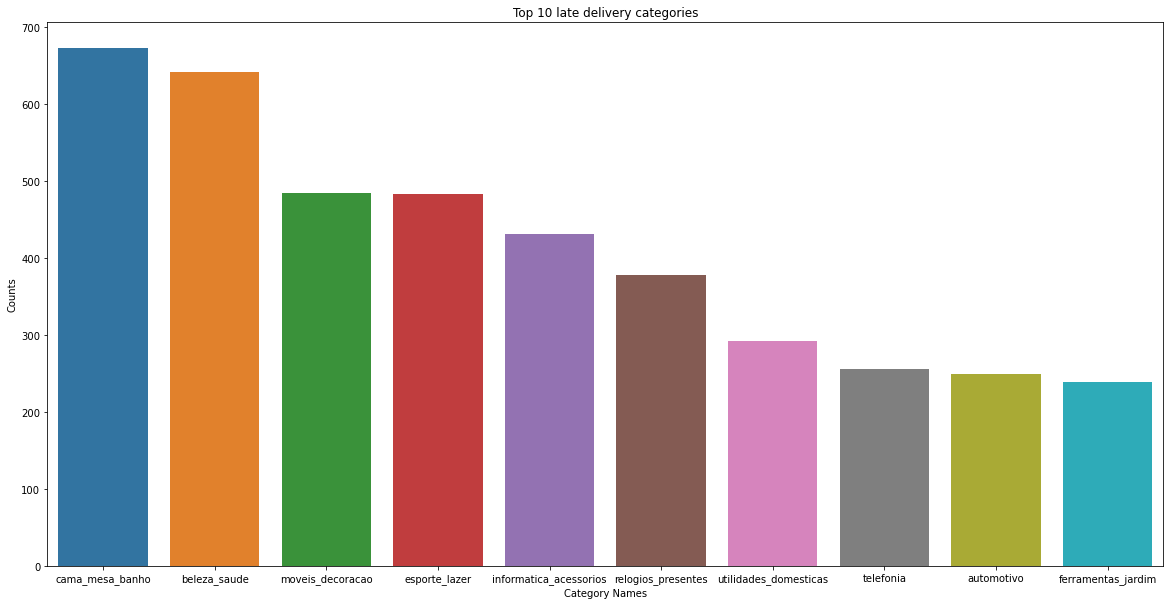

In [50]:
plt.figure(figsize=(20,10))
sns.barplot(x= top_10_late.index, y='order_id', data=top_10_late)
plt.title("Top 10 late delivery categories")
plt.xlabel("Category Names")
plt.ylabel("Counts")

In [60]:
# Translations
category_name_translation[category_name_translation.loc[:, 'product_category_name'] == 'beleza_saude']

product_category_name product_category_name_english
0          beleza_saude                 health_beauty

### Top categories by sales $$$

In [52]:
top_sales = orders_test1.groupby('product_category_name').agg({'price': 'sum'}).sort_values(by = 'price', ascending = False)
top_sales = top_sales.head(10)
top_sales

price
product_category_name             
beleza_saude            1233211.61
relogios_presentes      1165898.98
cama_mesa_banho         1023300.77
esporte_lazer            954626.07
informatica_acessorios   888613.62
moveis_decoracao         711493.09
utilidades_domesticas    615628.69
cool_stuff               609964.13
automotivo               578849.35
brinquedos               471197.48

AttributeError: This method only works with the ScalarFormatter

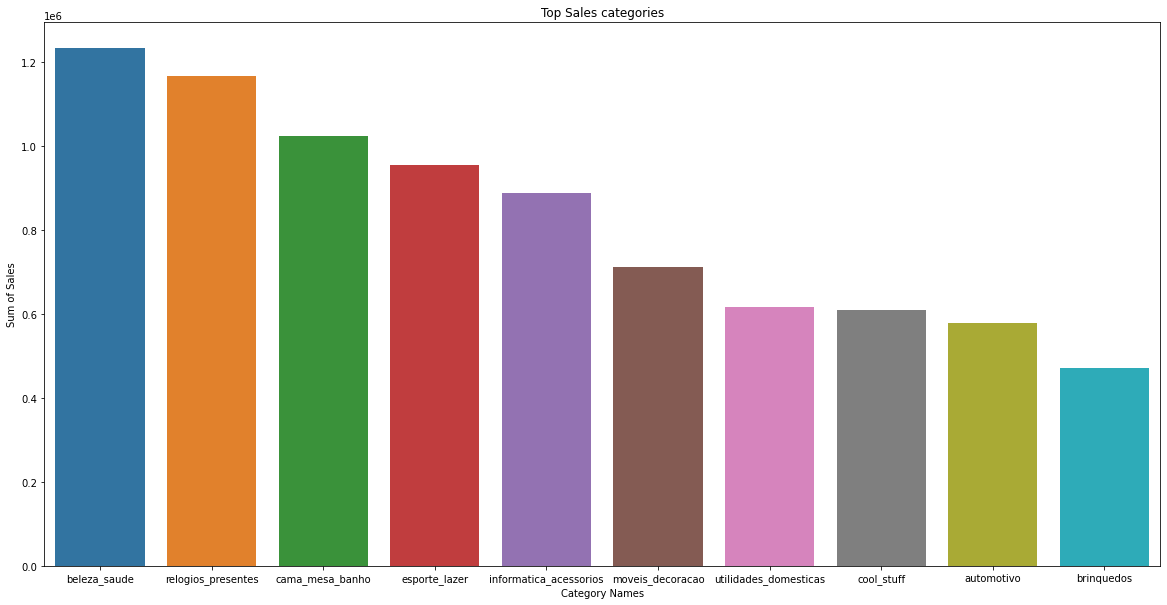

In [82]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x= top_sales.index, y=top_sales.price, data=top_sales)
plt.title("Top Sales categories")
plt.xlabel("Category Names")
plt.ylabel("Sum of Sales")
ax.ticklabel_format(style='Plain')

In [69]:
category_name_translation[category_name_translation.loc[:, 'product_category_name'] == 'brinquedos']

product_category_name product_category_name_english
14            brinquedos                          toys

### Top sales relative to units

### Top product_categories by sales count

In [ ]:
top_10_on_time = orders_test1[orders_test1.loc[:, 'diff_est_deliv-deliv(days)'] >= 0]
top_10_on_time = top_10_on_time.groupby('product_category_name', as_index = True).count().sort_values(by = 'order_id', ascending = False)
top_10_on_time = top_10_on_time.head(10)
top_10_on_time

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x= top_10_on_time.index, y= 'order_id', data=top_10_on_time)
plt.title("Top 10 sales counts")
plt.xlabel("Category Names")
plt.ylabel("Counts")

In [ ]:
orders_test1[orders_test1[:,'product_category_translations'] == 'beleza_suade']

In [ ]:
### Average freight prices

In [ ]:
orders_test1['freight_value'].mean()

In [ ]:
orders_test1['order_status'].value_counts()

## Okay here's the regression

In [70]:
rnd_smpl = orders_test1.sample(1000)

In [71]:
# Building test model
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [72]:
formula = 'freight_value ~ density'

In [73]:
formula = 'freight_value ~ price + product_weight_g + volume'

In [74]:
train, test = statsmodels_train_test_split(rnd_smpl)

In [75]:
linear_model = smf.ols(formula=formula, data=train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          freight_value   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.69e-94
Time:                        16:23:06   Log-Likelihood:                -2846.3
No. Observations:                 750   AIC:                             5701.
Df Residuals:                     746   BIC:                             5719.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.2871      0.508     26.135      0.000      12.289      14.285
price                0.0152      0.002      6.154      0.000       0.010       0.020
product_weight_g     0.0018      0.000      9.920      0.000       0.001       0.002
volume            5.065e-05   2.79e-05      1.815      0.070   -4.15e-06       0.000
==============================================================================
Omnibus:                      512.914   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10658.260
Skew:                           2.771   Prob(JB):                         0.00
Kurtosis:                      20.617   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Top 10 categories on time

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot( top_10_seller)
plt.title("")
plt.xlabel("seller_id")
plt.ylabel("Counts")

In [ ]:
orders_test1.info()

Okay... So here's what I have so far... 

1: Top 10 delivery categories(products), densities, volumes, and zipcodes
2: Regression
3: Distribution of delivery times. On-time and latenessf
4: Number of late orders vs on-time
5: geo- freight value ratio geo- revenue
7: geo- avg delivery
8: geo- avg ticket
9: 

<!--  geo- freight value ratio geo- revenue
     distribution of liftime customer orders
     zipcodes proof
     number of orders over time
     lateness country-wide
     histogram (1 order) & (repeat customers) 
 -->

In [ ]:
# WHYYyyyyyyyyyyyYYYyYYYYYYyYYYyYYYyYYYYyYYYYYYyYYYYYYYyyyyyYYYYYYYYYYYYYYYYYyYYYyyYyyyYy
#CAN'ttttTttttttTTTTTtTTTTTttttttTTttttttttTTT
#I Figureeee

## Potential presentations... 

Slide 1: What is olist? 
slide 2: what does our end to end supply chain look like? 
....Potential questions to ask here are
        what are our average delivery times like
        what are our estimated delivery times like
        how late are we when we are?
        potential reasons why we are late?
            Who's delivering these products?
                is it our own fleet? is it a private fleed (fedex, ups, dhl?) or is it a public one 
            Is it certain products?
                How much do these products cost on average? does it even matter? 
                How much does the freight cost on these products. Are they costing us more money to deliver than non-late goods. 
            
        
Slide 3: 

We do know that there is a strong correlation with the distance from Sao Paulo & Rio and the amount of money that is spent, the cost of Freight values, and basket sizes. 

Angles I can take.. 
    Incentivizing sellers to reduce lateness. Issues with this is that incentivization is already built into the business model as it's just a collection of marketplaces. Any deincentivization is really just deincentivization to use Olist 
    
    Looking at categories

In [ ]:
# categories with higher delay rates
# seller id's with higher delay rates
# destinations with high lateness
# effects of late deliveries on return orders. 

# Let's play with geography

In [54]:
geo = pd.read_csv("csv/olist_geolocation_dataset.csv", dtype={'geolocation_zip_code_prefix': str})

# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]
geo.head(3)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   

  geolocation_city geolocation_state geolocation_zip_code_prefix_1_digits  \
0        sao paulo                SP                                    0   
1        sao paulo                SP                                    0   
2        sao paulo                SP                                    0   

  geolocation_zip_code_prefix_2_digits geolocation_zip_code_prefix_3_digits  \
0                                   01                                  010   
1                                   01                                  010   
2                                   01                                  010   

  geolocation_zip_code_prefix_4_digits  
0                                 0103  
1                                 0104  
2                                 0104

In [55]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [56]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [57]:
# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix_1_digits'].astype(int)
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix_2_digits'].astype(int)
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [58]:
BOKEH_RESOURCES=inline

NameError: name 'inline' is not defined

In [ ]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
import holoviews.plotting.bokeh
from holoviews import opts
hv.Store.current_backend = 'bokeh'
hv.extension('bokeh')

# from geoviews import dim, opts
output_notebook()
hv.extension('bokeh')
gv.extension('bokeh')


%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [ ]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

In [ ]:
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

In [ ]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 

def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

In [ ]:
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

## Zip Codes in States
Lets look at the state of Sao Paulo (SP) to see how zip code prefixes works in a regional level. We see that:
* zip code prefixes in Sao Paulo state ranges from 01001 to 19990
* zip codes starting with 0 are in the Sao Paulo metro region
* zip codes starting with 1 are in the interior of the state

In [118]:
def filter_data(level, name):
    df = geo[geo[level] == name]
    #remove outliers
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [119]:
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                402651.000000
mean                   9030.831782
std                    5101.941134
min                    1001.000000
25%                    4661.000000
50%                    8257.000000
75%                   13330.000000
max                   19990.000000

In [120]:
plot_map(sp, 'Zip Codes in Sao Paulo State', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (geolocation_zip_code_prefix)

## Zip Codes in Large Cities 
Lets look at the city of Sao Paulo to see how zip code prefixes works in a city level. We see that:
* zip code prefixes in Sao Paulo city ranges from 01001 to 09540
* zip code prefixes are somehow related to neighborhoods or city districts

In [122]:
saopaulo = filter_data('geolocation_city', 'sao paulo')
agg_name = 'geolocation_zip_code_prefix'
saopaulo[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                135256.000000
mean                   4137.454996
std                    1804.189554
min                    1001.000000
25%                    2941.000000
50%                    4166.000000
75%                    5158.000000
max                    9540.000000

In [123]:
plot_map(saopaulo, 'Zip Codes in Sao Paulo City', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (geolocation_zip_code_prefix)

# Where does most revenue comes from?


In [125]:
orders_df = pd.read_csv('csv/olist_orders_dataset.csv')
order_items = pd.read_csv('csv/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('csv/olist_order_reviews_dataset.csv')
customer = pd.read_csv('csv/olist_customers_dataset.csv', dtype={'customer_zip_code_prefix': str})

# getting the first 3 digits of customer zipcode
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix'].str[0:3]
customer['customer_zip_code_prefix_3_digits'] = customer['customer_zip_code_prefix_3_digits'].astype(int)

brazil_geo = geo.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [126]:
# merging the data
orders = orders_df.merge(order_items, on='order_id')
orders = orders.merge(customer, on='customer_id')
orders = orders.merge(order_reviews, on='order_id')

In [127]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price 

In [138]:
plot_map(revenue, 'Orders Revenue (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (revenue)

### Orders Average Ticket

In [ ]:
# Histogram # of orders bucketed at different list prices. 

In [139]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
gp = gp.groupby('customer_zip_code_prefix_3_digits')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price

In [140]:
plot_map(avg_ticket, 'Orders Average Ticket (R$)', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (avg_ticket)

### Who pays more for transportation

In [142]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'customer_zip_code_prefix_3_digits': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.freight_value / gp.price
gp = gp.groupby('customer_zip_code_prefix_3_digits')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

In [143]:
plot_map(freight_ratio, 'Orders Average Freight Ratio', ds.mean(agg_name), agg_name, cmap=bgy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (freight_ratio)

### Average Delivery Times

In [144]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [145]:
gp = orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

In [146]:
plot_map(delivery_time, 'Orders Average Delivery Time (days)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (avg_delivery_time)

In [ ]:
## Distribution of number of orders per customers
##  sdhfdsjfgdflgjsdfjlaghfdajdfhaljkhfdlahfdalk